In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

characters = pd.read_csv('/content/simpsons_characters.csv',encoding='latin1')
episodes = pd.read_csv('/content/simpsons_episodes.csv',encoding='latin1')
locations = pd.read_csv('/content/simpsons_locations.csv',encoding='latin1')
script_lines = pd.read_csv('/content/simpsons_script_lines.csv',encoding='latin1')



<ipython-input-37-2fca67697af1>:9: DtypeWarning: Columns (5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  script_lines = pd.read_csv('/content/simpsons_script_lines.csv',encoding='latin1')


# **Top Speaking Characters**:

This below script calculates the total number of lines spoken by each character and then visualizes the top 10 speaking characters based on the total lines spoken.

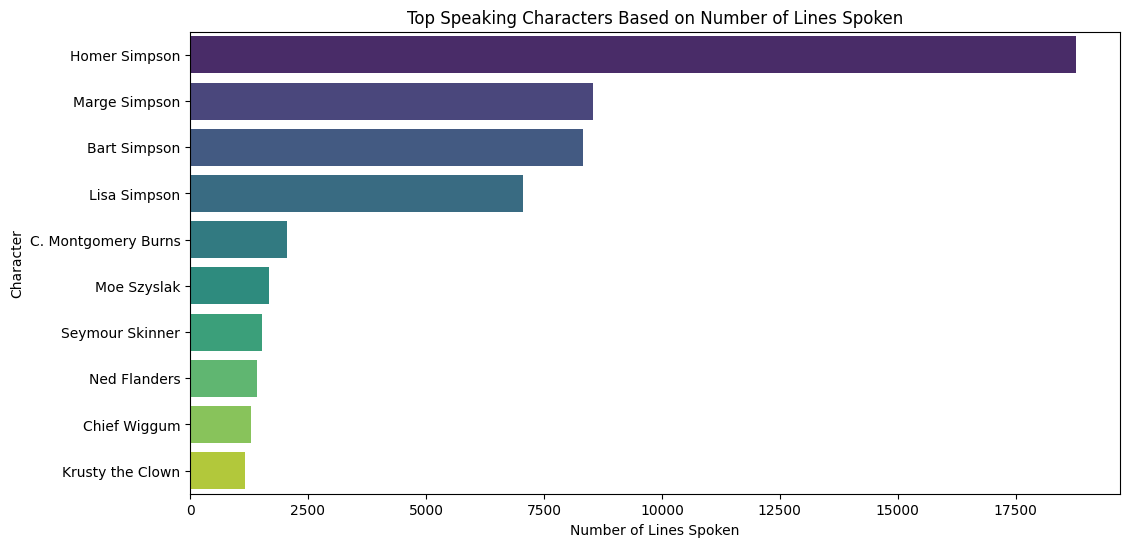

In [4]:
merged_data = script_lines.merge(characters[['id', 'name']], how='left', left_on='character_id', right_on='id')


character_line_counts = merged_data['name'].value_counts()


top_characters = character_line_counts.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_characters.values, y=top_characters.index, palette='viridis')
plt.title('Top Speaking Characters Based on Number of Lines Spoken')
plt.xlabel('Number of Lines Spoken')
plt.ylabel('Character')
plt.show()

##**Character Lines Pie Chart**:
This below script calculates the number of lines spoken by each character and then visualizes the percentage distribution in a pie chart.


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 156 (\x9c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


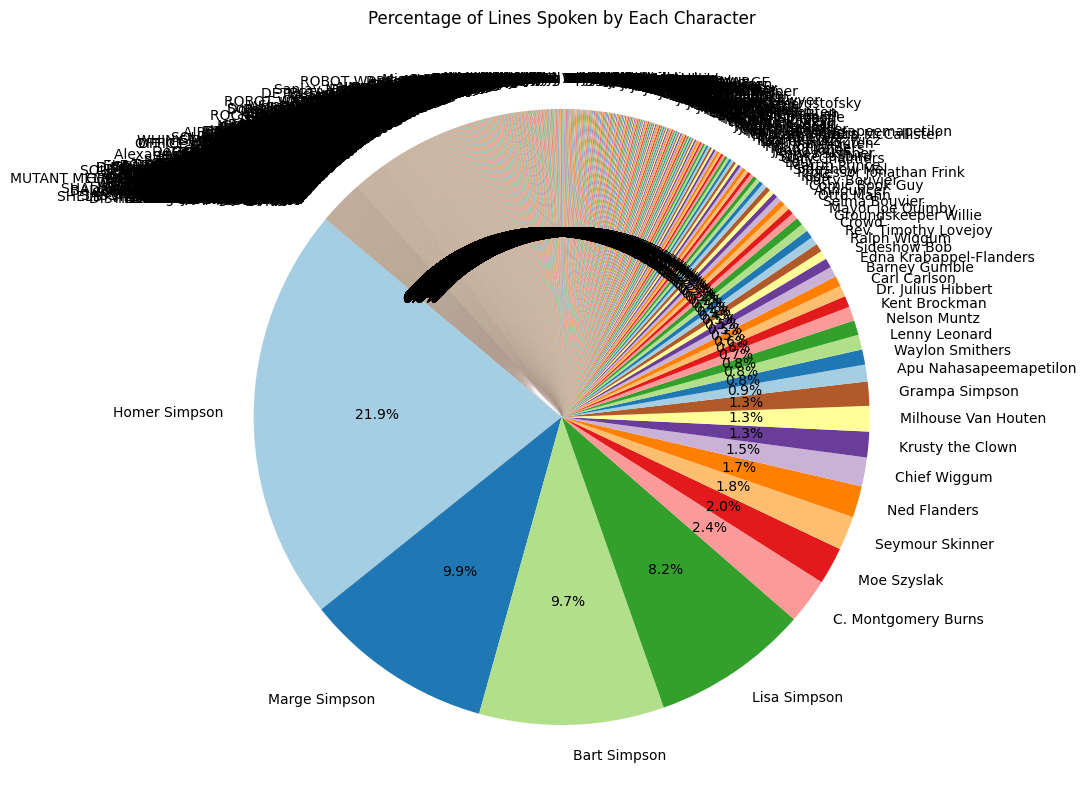

In [5]:
merged_data = script_lines.merge(characters[['id', 'name']], how='left', left_on='character_id', right_on='id')

character_line_counts = merged_data['name'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(character_line_counts, labels=character_line_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Percentage of Lines Spoken by Each Character')
plt.show()

#**Gender Distribution of Speaking Characters:**
This script merges the script lines dataset with the characters dataset to get the gender of each character. It then calculates the number of lines spoken by male and female characters and visualizes the distribution using a bar plot.

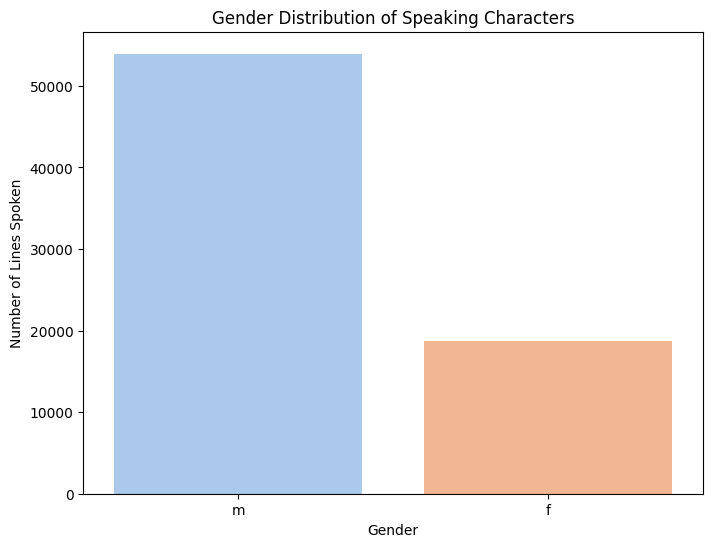

In [7]:
merged_data = script_lines.merge(characters[['id', 'gender']], how='left', left_on='character_id', right_on='id')

gender_line_counts = merged_data['gender'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=gender_line_counts.index, y=gender_line_counts.values, palette='pastel')
plt.title('Gender Distribution of Speaking Characters')
plt.xlabel('Gender')
plt.ylabel('Number of Lines Spoken')
plt.show()

##**Characters' Unique Words Cloud:**
This below script creates a word cloud for each character based on their unique spoken words. (u need to wait it will take long time)

##**Episode Count per Season**:
The script below to create a bar plot for episode count per season and identify/visualize the top and bottom episodes based on IMDb ratings

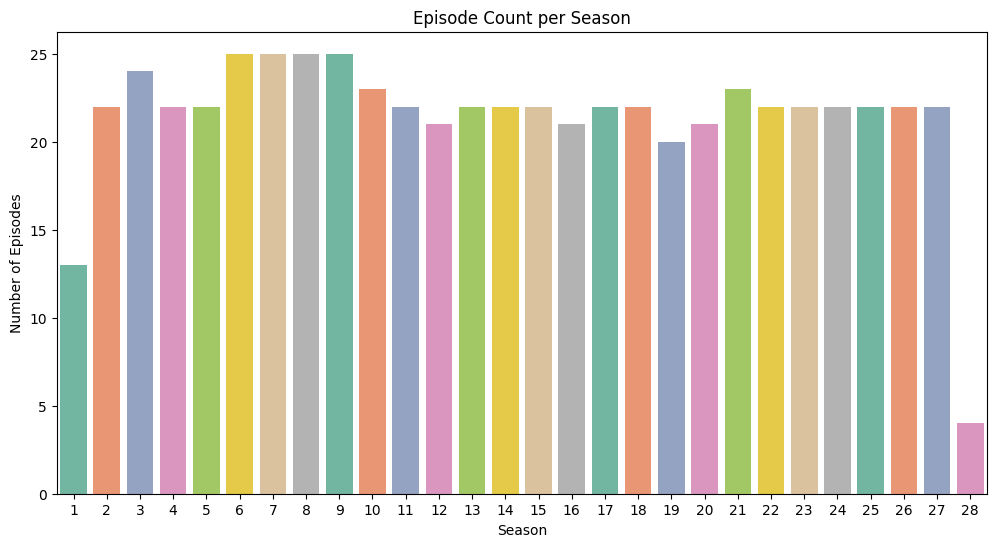

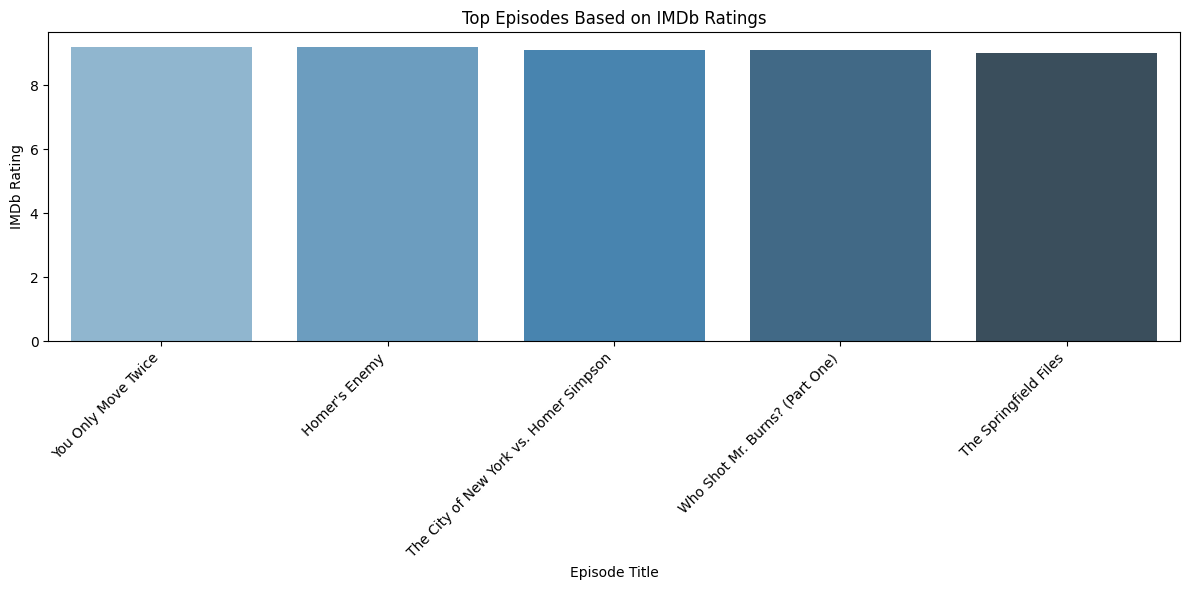

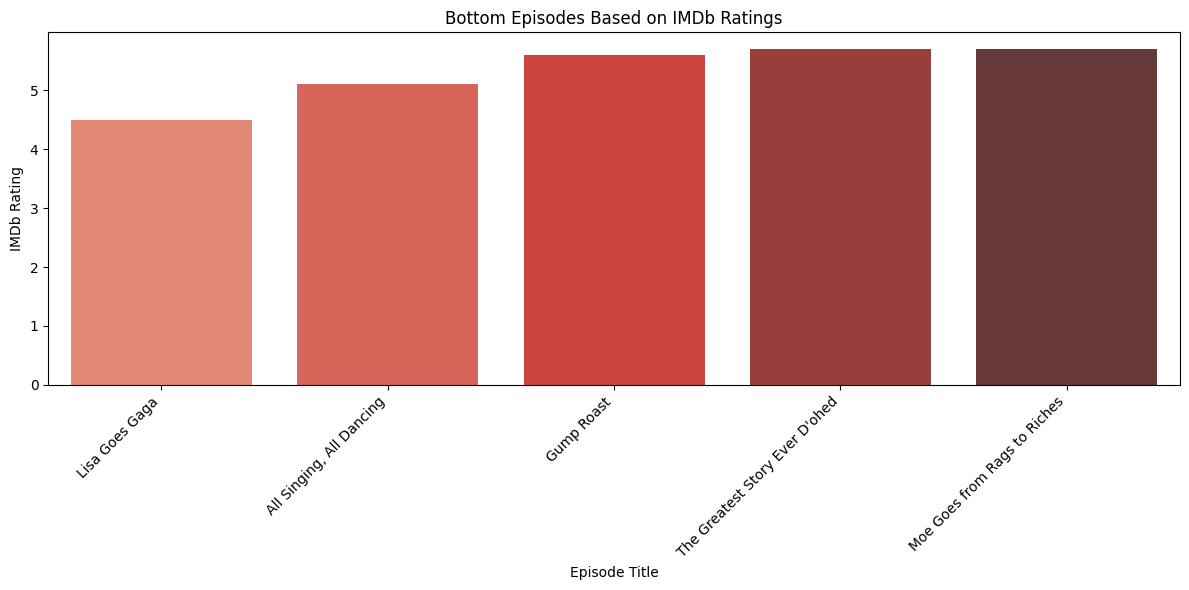

In [11]:
episode_count_per_season = episodes.groupby('season').size()

plt.figure(figsize=(12, 6))
sns.barplot(x=episode_count_per_season.index, y=episode_count_per_season.values, palette='Set2')
plt.title('Episode Count per Season')
plt.xlabel('Season')
plt.ylabel('Number of Episodes')
plt.show()

top_episodes = episodes.nlargest(5, 'imdb_rating')
bottom_episodes = episodes.nsmallest(5, 'imdb_rating')

plt.figure(figsize=(12, 6))
sns.barplot(x=top_episodes['title'], y=top_episodes['imdb_rating'], palette='Blues_d')
plt.title('Top Episodes Based on IMDb Ratings')
plt.xlabel('Episode Title')
plt.ylabel('IMDb Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=bottom_episodes['title'], y=bottom_episodes['imdb_rating'], palette='Reds_d')
plt.title('Bottom Episodes Based on IMDb Ratings')
plt.xlabel('Episode Title')
plt.ylabel('IMDb Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##**Seasonal Viewership Bar Chart:**
This below script calculates the average viewership per season and visualizes it using a bar chart.

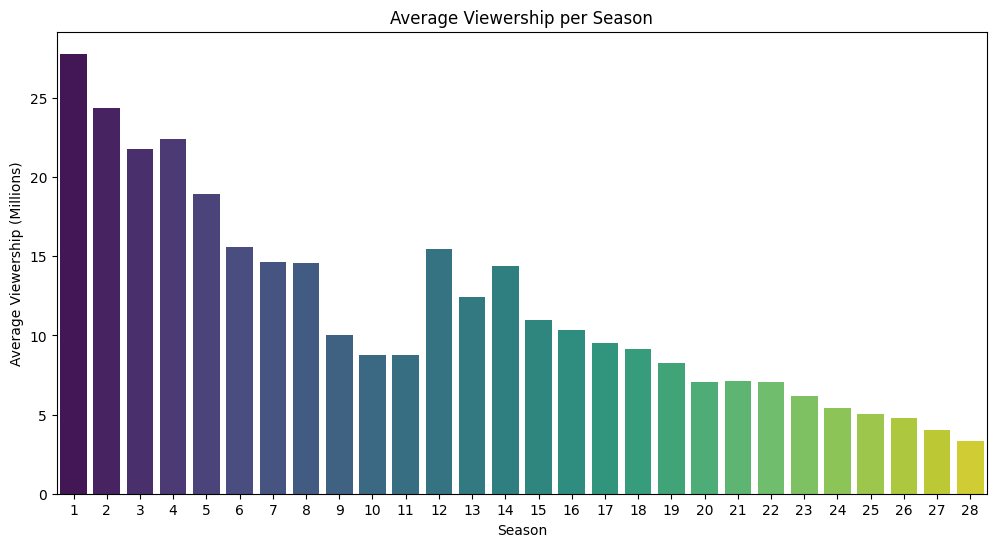

In [12]:
average_viewership_per_season = episodes.groupby('season')['us_viewers_in_millions'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=average_viewership_per_season.index, y=average_viewership_per_season.values, palette='viridis')
plt.title('Average Viewership per Season')
plt.xlabel('Season')
plt.ylabel('Average Viewership (Millions)')
plt.show()

##**Top Locations Across Episodes:**
This below script should help you identify and visualize the most popular locations based on the number of lines spoken, and the resulting plot

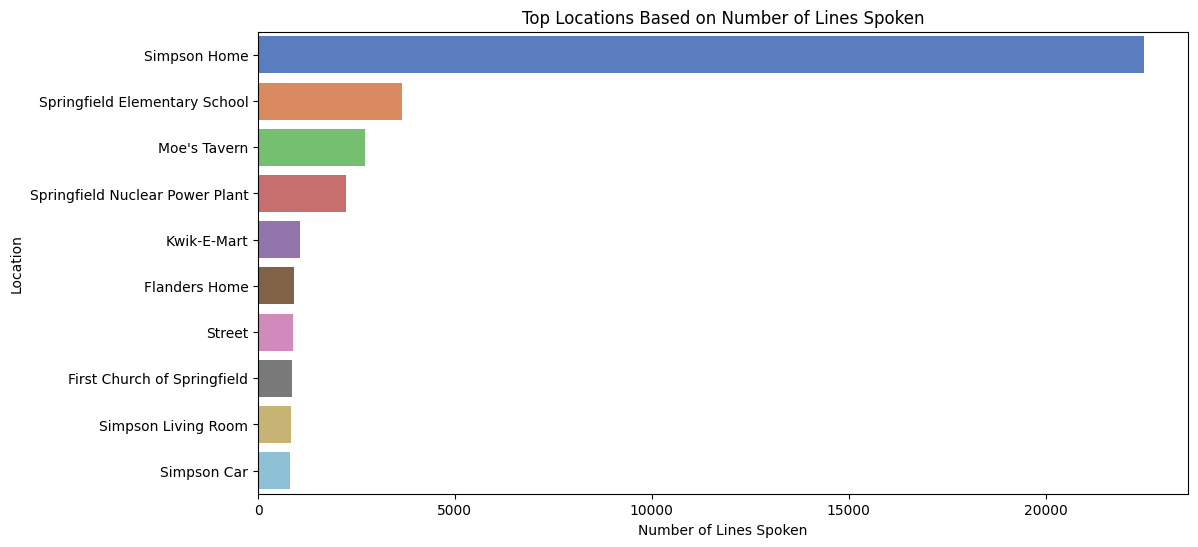

In [17]:
merged_data = script_lines.merge(locations[['id', 'name']], how='left', left_on='location_id', right_on='id')

top_locations = merged_data['name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='muted')
plt.title('Top Locations Based on Number of Lines Spoken')
plt.xlabel('Number of Lines Spoken')
plt.ylabel('Location')
plt.show()

##**Top Locations Bar Chart:**
This below script calculates the number of lines spoken at each location and visualizes the top 10 locations using a bar chart.

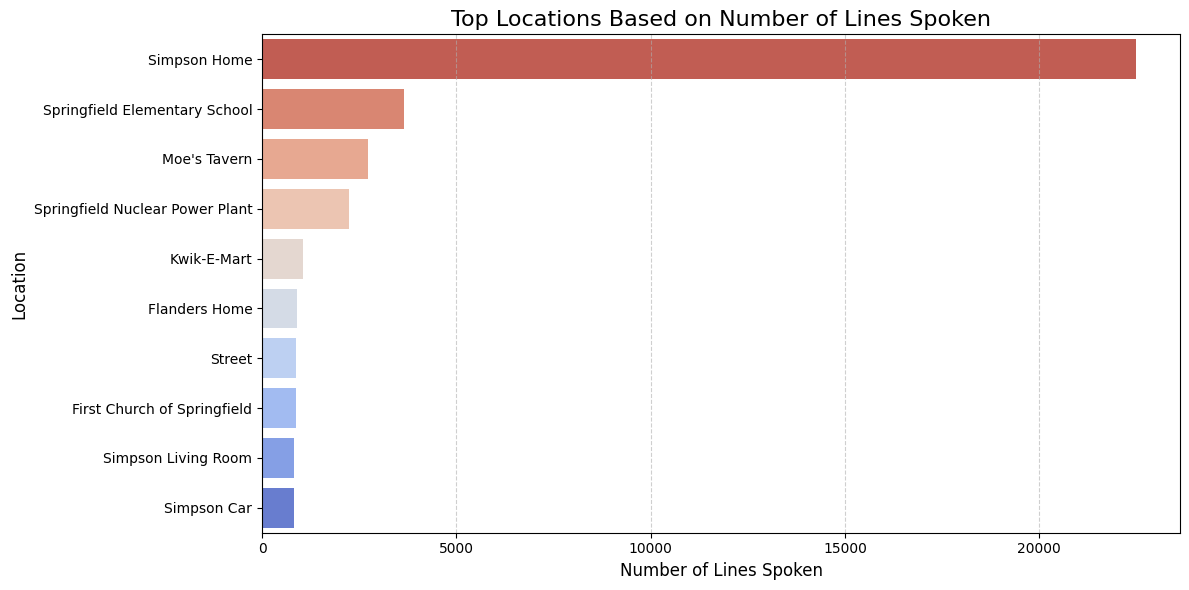

In [16]:
merged_data = script_lines.merge(locations[['id', 'name']], how='left', left_on='location_id', right_on='id')

top_locations = merged_data['name'].value_counts().head(10)


plt.figure(figsize=(12, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='coolwarm_r')
plt.title('Top Locations Based on Number of Lines Spoken', fontsize=16)
plt.xlabel('Number of Lines Spoken', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##**Word Cloud of Spoken Words:**
This script combines all spoken words into a single text and generates a word cloud using the WordCloud library.

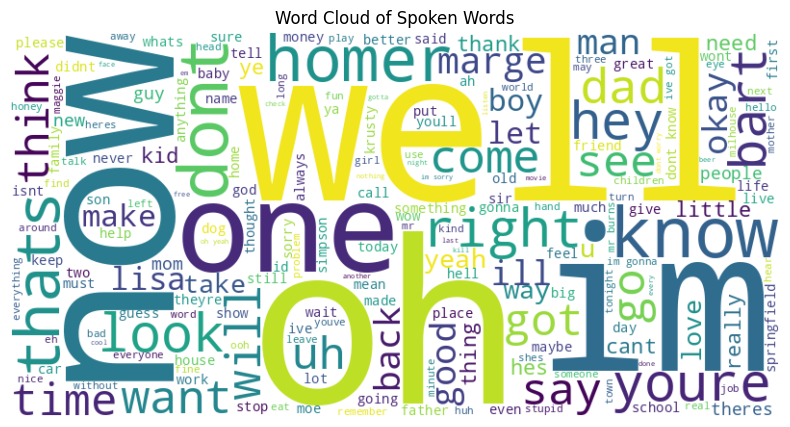

In [19]:
all_spoken_words = ' '.join(script_lines['normalized_text'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_spoken_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Spoken Words')
plt.show()

##**Sentiment Analysis Over Time:**
The below script calculates the sentiment polarity for each spoken word using TextBlob, then averages the sentiment for each episode. The resulting line plot shows the sentiment trend over episodes. You can adjust the code to analyze sentiment over seasons or other time intervals if needed.

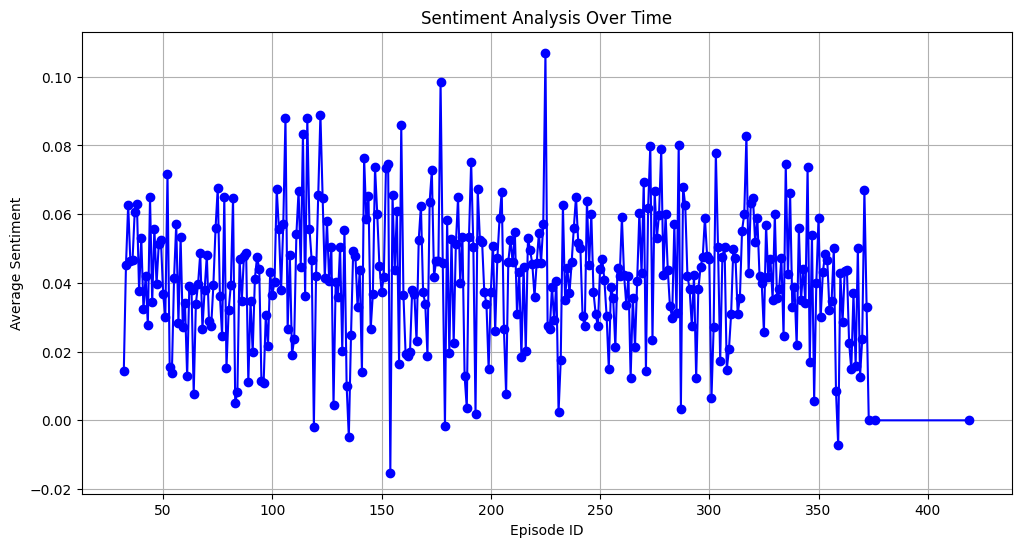

In [20]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity

script_lines['sentiment'] = script_lines['normalized_text'].apply(get_sentiment)

sentiment_over_time = script_lines.groupby('episode_id')['sentiment'].mean()

plt.figure(figsize=(12, 6))
plt.plot(sentiment_over_time.index, sentiment_over_time.values, marker='o', linestyle='-', color='b')
plt.title('Sentiment Analysis Over Time')
plt.xlabel('Episode ID')
plt.ylabel('Average Sentiment')
plt.grid(True)
plt.show()

##**Character Gender Distribution Pie Chart:**
Visualize the distribution of male and female characters using a pie chart. Count the number of characters for each gender.

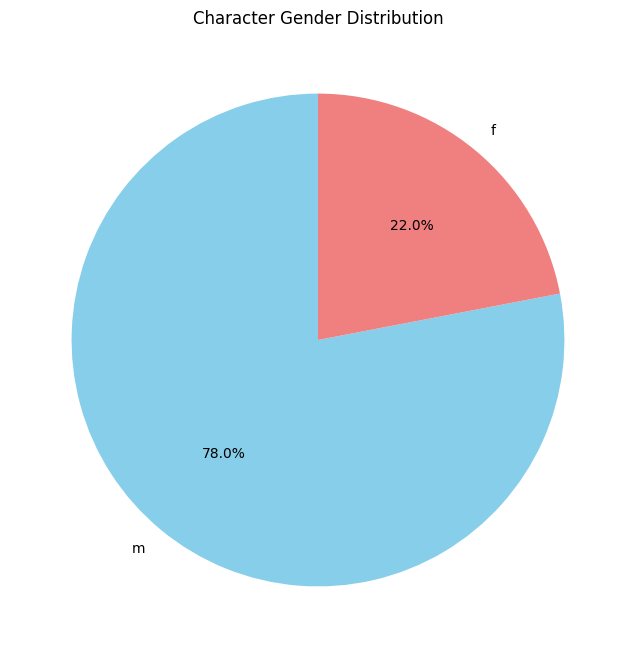

In [22]:
gender_distribution = characters['gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Character Gender Distribution')
plt.show()


##**Average IMDb Ratings per Season:**
Visualize the average IMDb ratings per season to observe trends in the overall episode ratings.

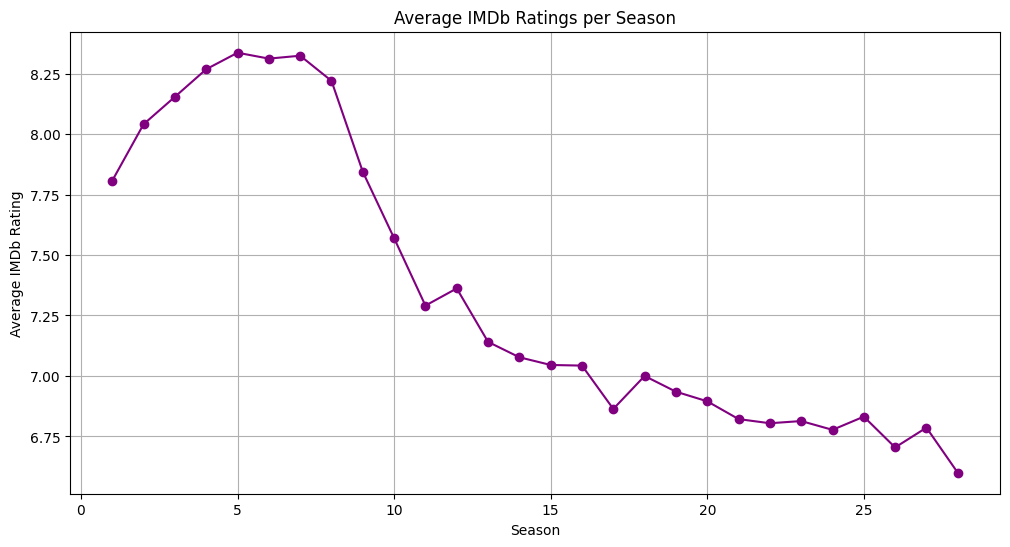

In [23]:
average_ratings_per_season = episodes.groupby('season')['imdb_rating'].mean()
plt.figure(figsize=(12, 6))
plt.plot(average_ratings_per_season.index, average_ratings_per_season.values, marker='o', linestyle='-', color='purple')
plt.title('Average IMDb Ratings per Season')
plt.xlabel('Season')
plt.ylabel('Average IMDb Rating')
plt.grid(True)
plt.show()


##**Viewership Over Time:**

To visualize the trend of viewership over the years, you can create a line plot using matplotlib. Assuming you have the 'original_air_year' and 'us_viewers_in_millions' columns in your 'episodes' dataset,

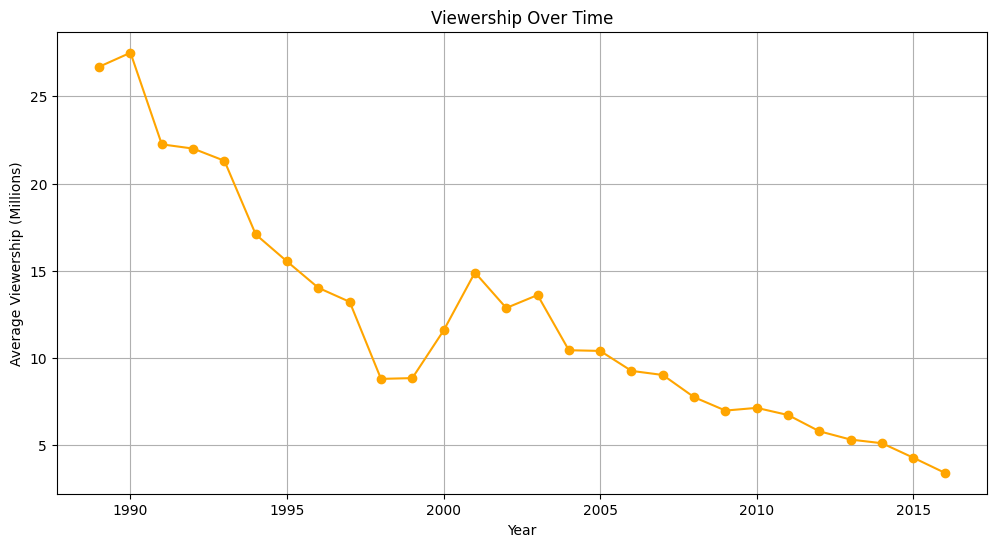

In [27]:
average_viewership_over_time = episodes.groupby('original_air_year')['us_viewers_in_millions'].mean()
plt.figure(figsize=(12, 6))
plt.plot(average_viewership_over_time.index, average_viewership_over_time.values, marker='o', linestyle='-', color='orange')
plt.title('Viewership Over Time')
plt.xlabel('Year')
plt.ylabel('Average Viewership (Millions)')
plt.grid(True)
plt.show()